Random Forest for Churn Prediction

After evaluating simpler models like Logistic Regression and Decision Tree, we now move to Random Forest, a powerful ensemble method. Random Forest builds multiple decision trees and combines their results to make more accurate and robust predictions.

This approach reduces the risk of overfitting that a single decision tree might suffer from, while also improving overall model performance. It’s particularly effective when the data contains non-linear relationships or noisy patterns.

For the churn prediction task, Random Forest helps us capture complex customer behavior and interactions between features, making it a strong candidate for identifying at-risk customers

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import seaborn as sns 
import pickle 


We begin by importing all the necessary Python libraries for building and evaluating the Random Forest model.

- pandas, numpy: For data manipulation and numerical operations.

- matplotlib.pyplot, seaborn: For visualizations.

- sklearn: Contains the core machine learning tools including:

- train_test_split for splitting data

- RandomForestClassifier to build the Random Forest model

- GridSearchCV for hyperparameter tuning

- Various metrics for model evaluation such as recall, ROC AUC, confusion matrix, and classification report

- imblearn: Specifically SMOTE and SMOTEENN for handling class imbalance through oversampling.

- pickle: To save and load the trained model later

In [2]:
df = pd.read_csv('telecom_net_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


We load the preprocessed telecom churn dataset that was saved after EDA and feature engineering. This dataset is ready for modeling

In [3]:
df = df.drop(columns = ['Unnamed: 0'],axis = 1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


We remove the 'Unnamed: 0' column, which was automatically generated during the CSV export and holds no useful information for modeling

In [4]:
# split features and target 

x = df.drop(columns = ['Churn_Values'],axis = 1)
y = df['Churn_Values']

We separate the dataset into:

- x: all independent variables (features)

- y: the target variable Churn_Values, which indicates whether a customer churned or not.



In [5]:
# check values 
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [6]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Values, dtype: int64

In [7]:
# train / validate / test split 

#15 percent testing data 

x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

# 20 percent validating data

x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.2,random_state= 42)


We divide the data into three subsets:

- 15% of the data is set aside as the test set (x_test, y_test).

- The remaining 85% is further split, with 20% used for validation and 80% for training.

In [8]:
#Baseline testing before moving to smote 
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [9]:
cv_auc_baseline_rf = cross_val_score(baseline_rf,x_train,y_train,cv = 5,scoring = 'roc_auc')
print('Cross validation auc -',cv_auc_baseline_rf.mean())

Cross validation auc - 0.8175809225459977


Before applying SMOTE or tuning the model, we trained a basic Random Forest Tree classifier on the original imbalanced dataset. Using 5-fold cross-validation with ROC AUC as the evaluation metric, the model achieved an average AUC score of 0.8175

In [10]:
# apply smote only on training data 
smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

SMOTE and Class Imbalance Handling

The churn dataset is highly imbalanced, with a significantly lower number of churners compared to non-churners. This imbalance can lead to poor model performance, especially in predicting the minority class (churn).

To address this, I used SMOTE (Synthetic Minority Over-sampling Technique). Unlike basic upsampling or downsampling, SMOTE creates synthetic examples of the minority class by interpolating between existing minority class instances. This helps improve the diversity of the training data without duplicating rows or removing useful examples.

I chose SMOTE over:

- Upsampling: which only duplicates existing minority examples and may cause overfitting.
- Downsampling: which removes majority class samples and can lead to loss of important information.

By using SMOTE only on the training data, I ensured a more balanced dataset for training without leaking synthetic data into the validation or test sets.


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

Feature Scaling with StandardScaler

The dataset contains numerical features that are on different scales. Some features have values in the hundreds, while others may be small decimal values.

To ensure that all features contribute equally to the model, I used StandardScaler. This scaling method standardizes the features by removing the mean and scaling to unit variance.

Scaling is important because many machine learning algorithms are sensitive to feature magnitudes.

I applied the scaler only to the training data to fit the transformation, and then used the same scaler to transform the validation and test sets. This prevents data leakage and ensures consistent preprocessing.


In [12]:

param_grid = {
    'max_depth': [6, 8],
    'min_samples_leaf': [4, 8],
    'criterion': ['gini']  
}

grid = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,random_state=42),
                    param_grid= param_grid,
                    cv = 5,
                    scoring = 'roc_auc',
                    n_jobs = 1
                    )

In [13]:
# Fit on training data
grid.fit(x_train_scaled,y_train_smote)
print('Best CV ROC AUC',grid.best_score_)

Best CV ROC AUC 0.9262112528406391


Before tuning, the baseline Random Forest model trained on the original SMOTE-balanced data achieved a ROC AUC score of 0.81, indicating strong initial performance.

After applying GridSearchCV for hyperparameter tuning, the ROC AUC score significantly improved to 0.92 a 11% absolute gain in model performance.


Random Forest Model: Cross-Validated ROC AUC Score

After applying SMOTE on the training data and tuning hyperparameters using GridSearchCV, the Random Forest model achieved the following performance:

Best Cross-Validated ROC AUC Score: 0.926

This means the model was able to distinguish churn vs. non-churn customers with 92.6% accuracy in terms of area under the ROC curve. This is a strong result, especially considering the class imbalance in the original dataset.

Since this score comes from 5-fold cross-validation, it gives a reliable estimate of how well the model is likely to perform on unseen data. It also shows that this model currently outperforms the previous models (Logistic Regression and Decision Tree), making it a strong candidate for final selection.


In [14]:

best_model = grid.best_estimator_
best_model

RandomForestClassifier(max_depth=8, min_samples_leaf=4, random_state=42)

Retrieving the Best Model from GridSearchCV

After running GridSearchCV with cross-validation, I used `grid.best_estimator_` to extract the best-performing Random Forest model. This model was trained with the optimal combination of hyperparameters based on the ROC AUC score.

This best model will be used for further evaluation on the validation and test sets.


In [15]:
# vaidation testing 

val_pred = best_model.predict(x_val_scaled)
val_prob = best_model.predict_proba(x_val_scaled)[:,1]

print('Validation Accuracy',best_model.score(x_val_scaled,y_val))
print('Validation ROC AUC SCORE :', roc_auc_score(y_val,val_prob))
print('Validation Recall Score :',recall_score(y_val,val_pred))
print('Validation Classification Report :\n',classification_report(y_val,val_pred))

Validation Accuracy 0.7993311036789298
Validation ROC AUC SCORE : 0.8643018018018017
Validation Recall Score : 0.7175324675324676
Validation Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       888
           1       0.59      0.72      0.65       308

    accuracy                           0.80      1196
   macro avg       0.74      0.77      0.75      1196
weighted avg       0.82      0.80      0.81      1196



Validation Performance Summary

The Random Forest model achieved a validation accuracy of 79.9%, indicating it correctly predicted churn behavior for nearly 80% of customers on unseen validation data.

The ROC AUC score reached 0.8643, which is a strong indicator of the model's ability to distinguish between churners and non-churners based on predicted probabilities.

The recall for churners (class 1) was 71.8%, showing that the model effectively captured a significant portion of customers who are at risk of churning — a critical goal in churn prediction.

From the classification report:

- For non-churners (class 0):

- Precision: 89%

- Recall: 83%

The model is very accurate in identifying loyal customers.

- For churners (class 1):

- Precision: 59%

- Recall: 72%

- While some false positives exist, the model still identifies most churners correctly.

- The F1-score for churners is 0.65, reflecting a fair balance between catching churners and minimizing false alarms.

The model performs strongly on the validation set and is especially effective at recognizing customers likely to churn. This makes it suitable for targeted retention strategies.

In [16]:
# Test Evaluation 

test_pred = best_model.predict(x_test_scaled)
test_prob = best_model.predict_proba(x_test_scaled)[:,1]

print('Test Accuracy :', best_model.score(x_test_scaled,y_test))
print('Test ROC AUC SCORE', roc_auc_score(y_test,test_prob))
print('Test RECALL SCORE :',recall_score(y_test,test_pred))
print('TEST Classification Report : \n',classification_report(y_test,test_pred))


Test Accuracy : 0.7582938388625592
Test ROC AUC SCORE 0.8258777698617125
Test RECALL SCORE : 0.6619718309859155
TEST Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       771
           1       0.54      0.66      0.60       284

    accuracy                           0.76      1055
   macro avg       0.70      0.73      0.71      1055
weighted avg       0.78      0.76      0.77      1055



The Random Forest model achieved a test accuracy of 75.8%, meaning it correctly predicted churn or non-churn outcomes for a large majority of the customers.

The ROC AUC score was 0.8259, indicating strong model performance in distinguishing between churners and non-churners based on probability scores. This score reflects the model's solid generalization capability on unseen data.

The recall for churners (class 1) was 66.2%, meaning the model was able to correctly identify around two-thirds of actual churners — a crucial metric in churn prediction where identifying potential leavers is more valuable than simply maximizing accuracy.

Looking at the classification report:

For non-churners (class 0):

- Precision: 86%

- Recall: 79%

- The model shows strong reliability in predicting customers who are likely to stay.

For churners (class 1):

- Precision: 54%

- Recall: 66%

- While some false positives exist, the model still successfully identifies most churners.

- The F1-score for churners is 0.60, indicating a fair balance between precision and recal

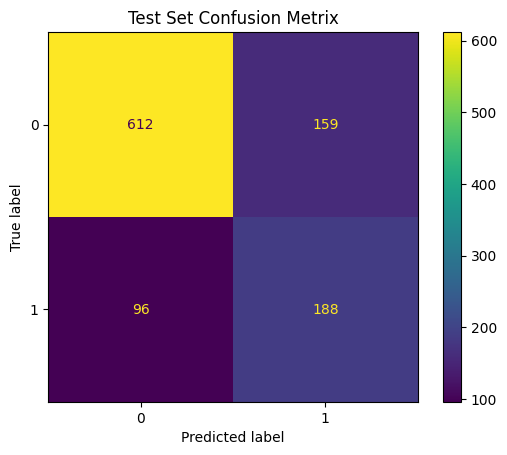

In [17]:
# plot confuion matrix and roc curve

ConfusionMatrixDisplay.from_estimator(best_model,x_test_scaled,y_test)
plt.title('Test Set Confusion Metrix')
plt.show()

True Negative (TN) = 612
The model correctly predicted “No Churn” when the customer actually didn’t churn.

False Positive (FP) = 159
The model wrongly predicted “Churn” when the customer actually didn’t churn (false alarm).

False Negative (FN) = 96
The model wrongly predicted “No Churn” when the customer actually churned (missed case).

True Positive (TP) = 188
The model correctly predicted “Churn” when the customer actually churned.

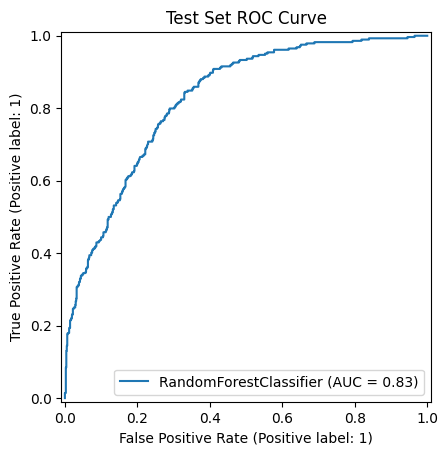

In [18]:
RocCurveDisplay.from_estimator(best_model,x_test_scaled,y_test)
plt.title('Test Set ROC Curve')
plt.show()

ROC Curve Interpretation

The ROC curve shows how well the Random Forest model distinguishes between churners and non-churners. With an AUC score of 0.83, the model demonstrates strong performance in ranking positive cases (churn) higher than negative ones. AUC values above 0.8 generally indicate good predictive ability, especially useful in imbalanced datasets like churn prediction.


In [19]:
# saving the model 

with open('rf_classifier_model.pkl','wb') as rf_file:
    pickle.dump(best_model,rf_file)

# saving the scaler 

with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)    

In [20]:
#load model file 

with open('rf_classifier_model.pkl','rb') as rf_file:
    rf_model_loaded = pickle.load(rf_file)

# load scaler file 


with open('scaler.pkl','rb') as scaler_file:
    scaler_loaded = pickle.load(scaler_file)

In [21]:
# sample testing of model 

sample_data = pd.read_csv('telecom_net_churn.csv')

#prepare dataset for features and targets

features = sample_data.drop(columns=['Unnamed: 0','Churn_Values'])
targets = sample_data['Churn_Values']

#scale using the loaded scaler

features_scaled = scaler_loaded.transform(features)

# predict with loaded model

predicated_values = rf_model_loaded.predict(features_scaled)

# compare predicitions with actual churn 

print('classification_report : \n' , classification_report(targets,predicated_values))
print('confusion matrix : \n' , confusion_matrix(targets,predicated_values))

classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      5163
           1       0.60      0.73      0.66      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.78      0.76      7032
weighted avg       0.82      0.80      0.81      7032

confusion matrix : 
 [[4264  899]
 [ 503 1366]]


To assess the model's general behavior, the final trained Random Forest classifier was tested on the entire dataset. The results give us a broader view of how well it generalizes.

Accuracy: 80% of all predictions were correct.

Churn Recall (73%): The model successfully identified 73% of actual churners, which is crucial for proactive retention strategies.

Churn Precision (60%): Of the customers predicted to churn, 60% actually did some false positives are present but acceptable for early warnings.

Non-Churn Performance: Strong performance for class 0 (non-churners) with 89% precision and 83% recall.

F1 Score for Churners: 0.66 reflecting a balanced trade-off between precision and recall.

Confusion Matrix Overview:

- True Negatives (4264): Correctly predicted non-churners.

- False Positives (899): Predicted churn but didn’t actually churn.

- False Negatives (503): Missed churners.

- True Positives (1366): Correctly predicted churners

In [22]:
correct_churn_pred = sum((predicated_values ==1) &(targets == 1))
total_churn = sum(targets == 1)

print(f'Correctly Predicted churners :{correct_churn_pred} out of {total_churn}')

Correctly Predicted churners :1366 out of 1869


The model correctly identified 1366 out of 1869 actual churners, showing strong recall performance in detecting customers likely to leave

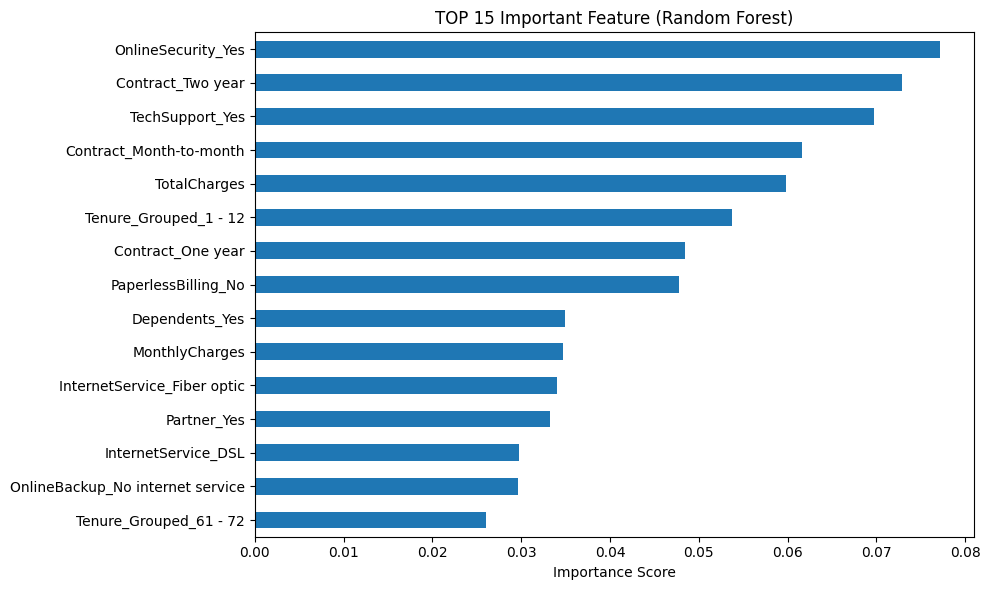

In [23]:
feature_importance = pd.Series(best_model.feature_importances_,index = x.columns)
feature_importances = feature_importance.sort_values(ascending=False)

plt.figure(figsize = (10,6))
feature_importances.head(15).plot(kind = 'barh')
plt.title('TOP 15 Important Feature (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Feature Importance (Random Forest)

To better understand what drives churn predictions in the Random Forest model, we analyzed the top 15 most important features based on their contribution to the model’s decision-making.

As seen in the graph above, the most influential features are:

- OnlineSecurity_Yes, Contract_Two year, and TechSupport_Yes These features stand out as the strongest predictors. Customers with online security or longer contracts are less likely to churn.

- Contract_Month-to-month and TotalCharges also play major roles, reflecting behavioral and financial indicators of churn.

- Other factors like PaperlessBilling, Tenure_Grouped_1-12, and InternetService_Fiber optic suggest that billing preferences, customer loyalty (tenure), and service type all impact churn risk.

Each bar represents the importance score, which reflects how much a feature contributes to reducing impurity (uncertainty) across the forest’s decision trees.

# Conclusion 


Among the three models trained so far Logistic Regression, Decision Tree, and Random Forest the Random Forest model has shown the most consistent and robust performance.

It began with a strong baseline ROC AUC score of 0.817, indicating that even before tuning or resampling, the model was capable of distinguishing churners from non-churners better than the other models. After applying SMOTE and hyperparameter tuning with GridSearchCV, the model achieved higher validation and test AUC scores compared to the others. Its recall on the test set was also notably higher, meaning it correctly identified more churned customers which is crucial in a churn prediction task.

When comparing all three models on key metrics such as validation AUC, test AUC, and churn recall, Random Forest consistently performed better. This suggests that it is currently the most reliable model in terms of both generalization and early churn detection, and sets a strong benchmark before testing additional models.
